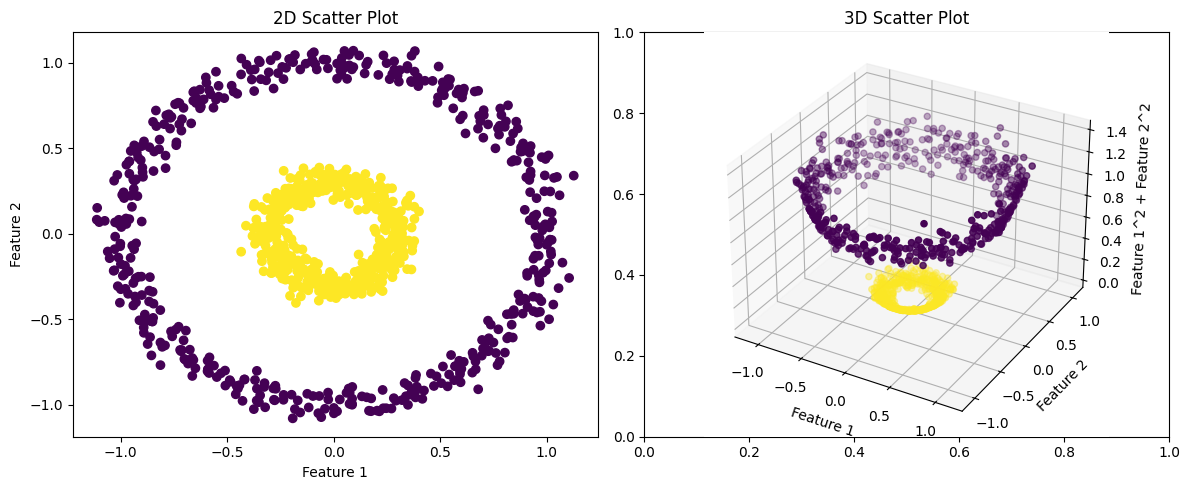

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons
from sklearn.decomposition import PCA, KernelPCA

x_circle, y_circle = make_circles(n_samples=1000, factor=0.3, noise=0.05, random_state=0)
x_moon, y_moon = make_moons(n_samples=1000, 
                  noise=0.01,
                  random_state=0)


sum_squared = x_circle[:, 0]**2 + x_circle[:, 1]**2

x_3d = np.column_stack((x_circle, sum_squared))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 2D scatter plot
axes[0].scatter(x_circle[:, 0], x_circle[:, 1], c=y_circle)
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].set_title('2D Scatter Plot')

# 3D scatter plot
ax = fig.add_subplot(122, projection='3d')
ax.scatter(x_3d[:, 0], x_3d[:, 1], x_3d[:, 2], c=y_circle)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 1^2 + Feature 2^2')
ax.set_title('3D Scatter Plot')

plt.tight_layout()
plt.show()

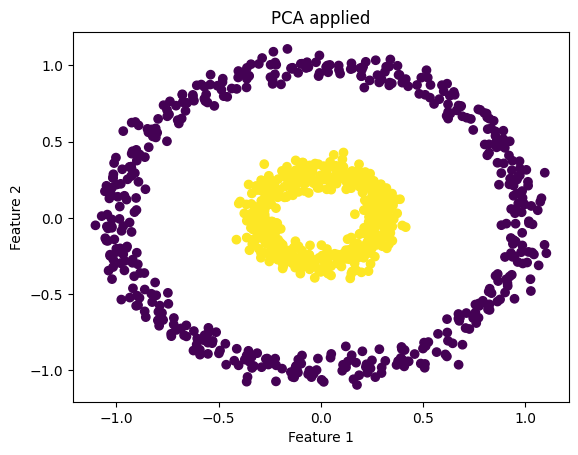

In [2]:
pca = PCA(n_components=2, )
x_pca = pca.fit(x_circle).transform(x_circle)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_circle)
plt.title('PCA applied')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

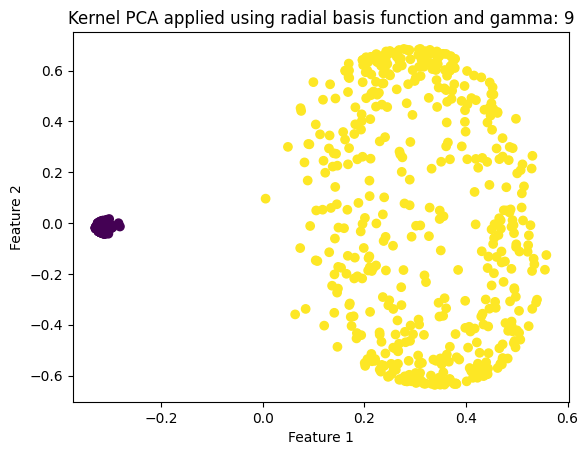

In [3]:
gamma=9
kernel_pca = KernelPCA(n_components=2, kernel="rbf", gamma=gamma)
x_kernel_pca = kernel_pca.fit(x_circle).transform(x_circle)
plt.title(f"Kernel PCA applied using radial basis function and gamma: {gamma}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(x_kernel_pca[:, 0], x_kernel_pca[:, 1], c=y_circle)
plt.show()

In [4]:
def plot_kernel_pca(x, y, hyperparams: dict):
    gamma = hyperparams.get('gamma', 9)
    degree = hyperparams.get('degree', 8)
    coef0 = hyperparams.get('coef0', 0.5)


    kernel_pca_rbf = KernelPCA(n_components=2, 
                               kernel="rbf", 
                               gamma=gamma)
    x_kernel_pca_rbf = kernel_pca_rbf.fit_transform(x)

    kernel_pca_poly = KernelPCA(n_components=2,
                                kernel='poly', 
                                degree=degree)
    x_kernel_pca_poly = kernel_pca_poly.fit_transform(x)


    kernel_pca_cosine = KernelPCA(n_components=2, kernel='cosine')
    x_kernel_pca_cosine = kernel_pca_cosine.fit_transform(x)

    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    for ax, data, title in zip(axes, [x, x_kernel_pca_rbf, x_kernel_pca_poly, x_kernel_pca_cosine],
                               ["Original data", 
                                "RBF Kernel PCA", 
                                "Polynomial Kernel PCA",
                                "Cosine Kernel PCA"]):
        ax.scatter(data[:, 0], data[:, 1], c=y)
        ax.set_title(title)
        ax.set_xlabel("Principal Component 1")
        ax.set_ylabel("Principal Component 2")

    plt.tight_layout()
    plt.show()

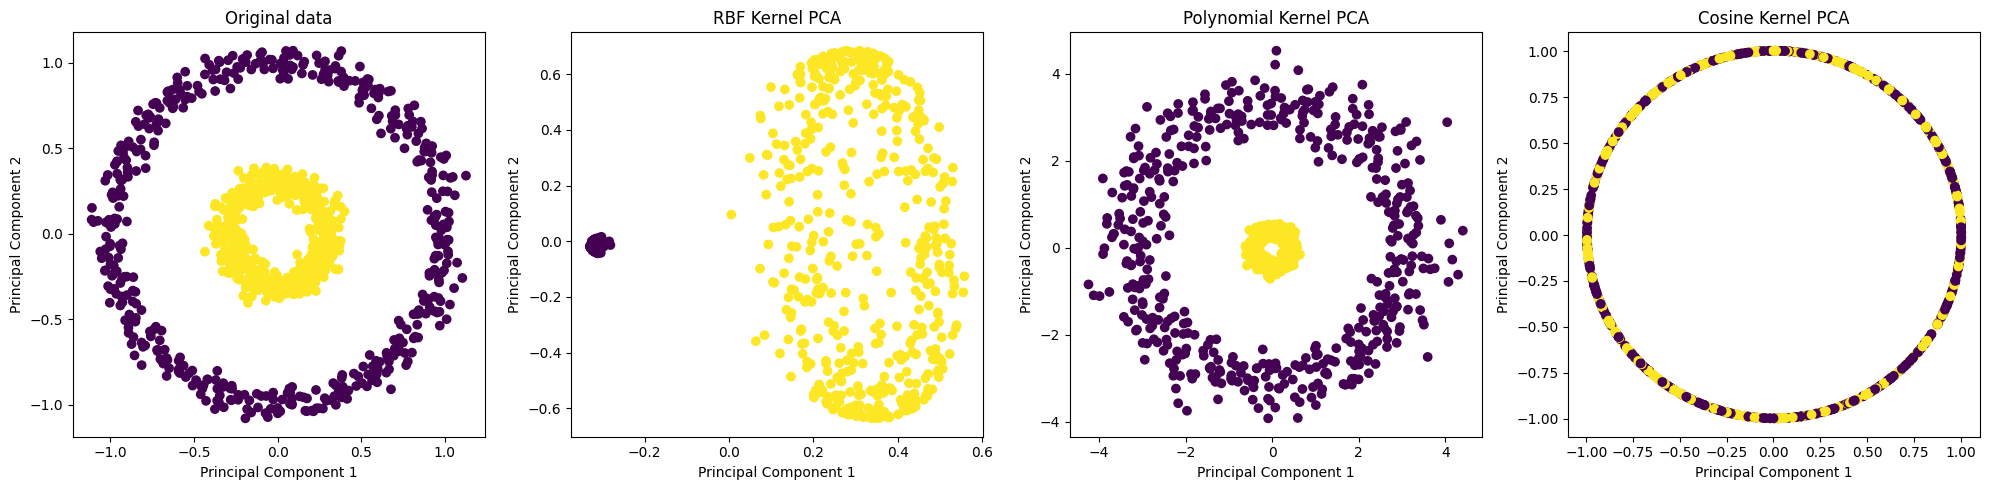

In [5]:
hyperparams = {
    'gamma': 9,
    'degree': 8,
    'coef0': 0.5
}
plot_kernel_pca(x_circle, y_circle, hyperparams)

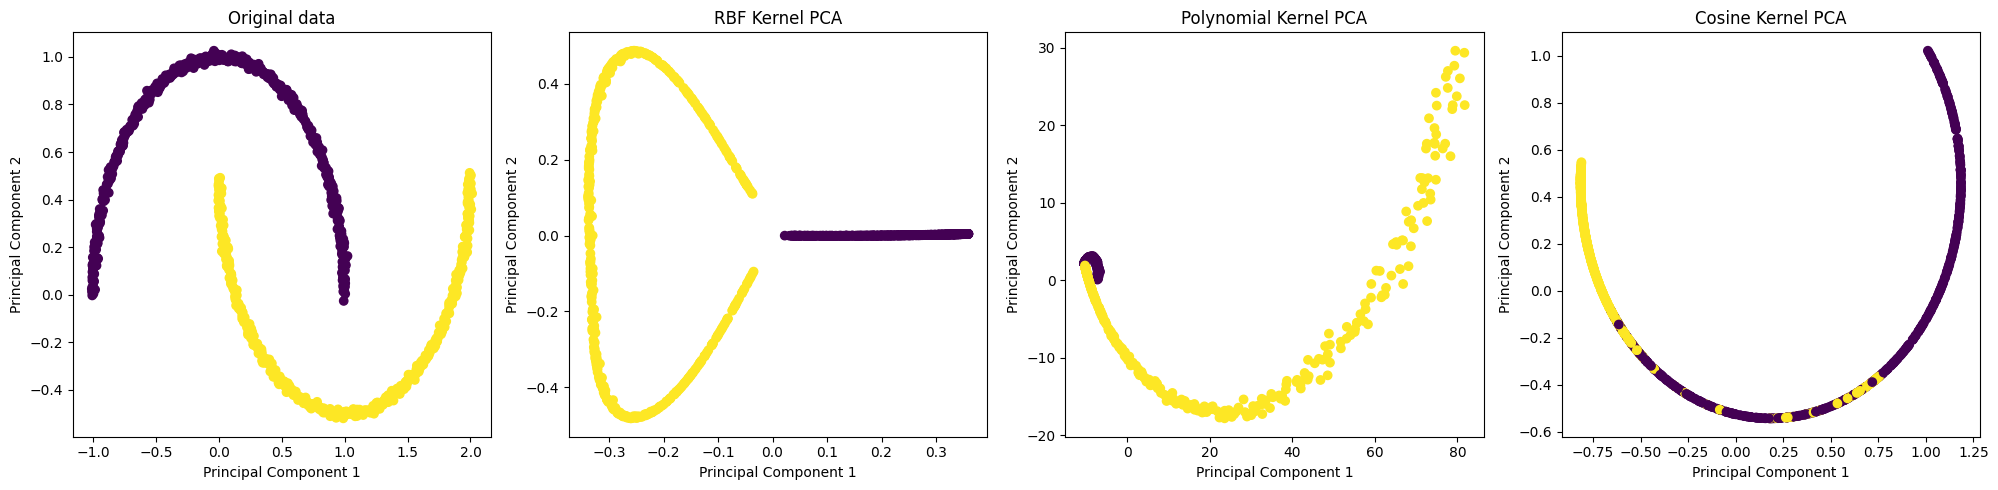

In [6]:
#Test it with the half moon data as well
hyperparams = {
    'gamma': 19,
    'degree': 8,
    'coef0': 0.9
}
plot_kernel_pca(x_moon, y_moon, hyperparams)

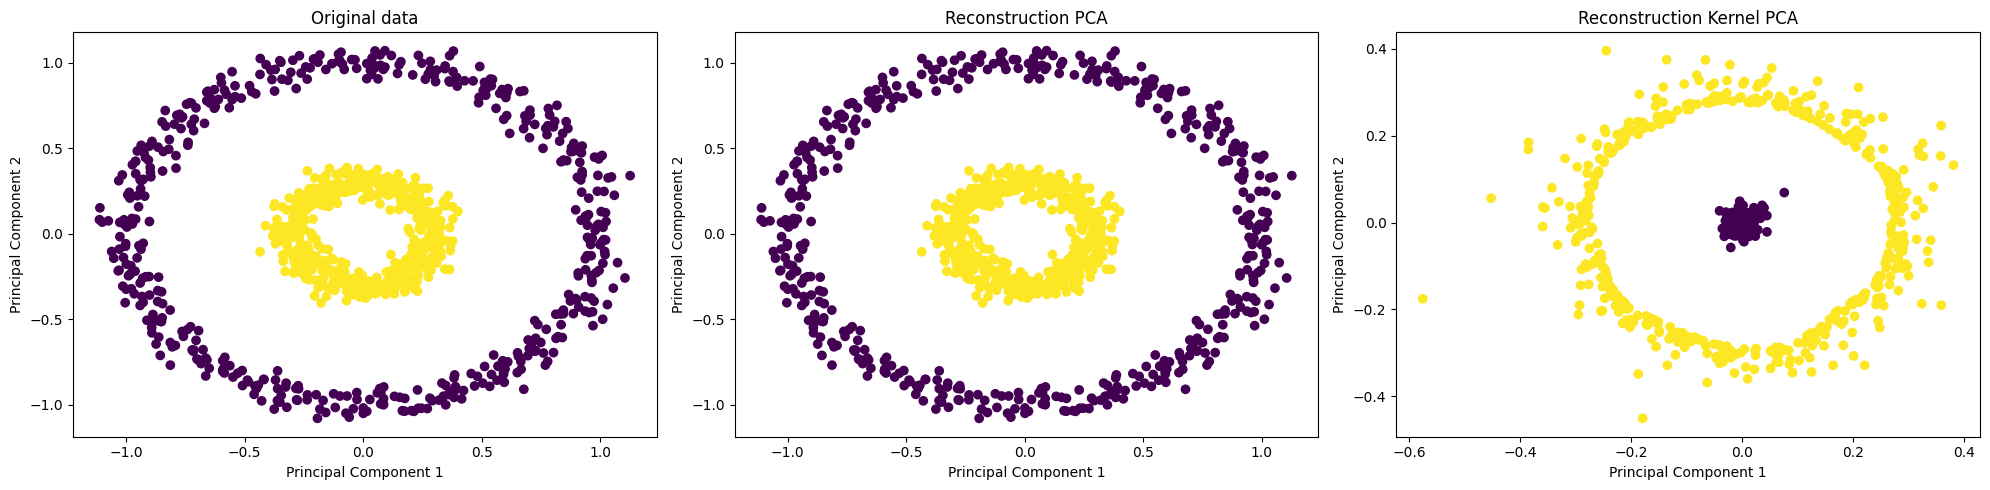

In [7]:
#Check the reconstruction with Kernel PCA compared to vanilla PCA

kernel_pca = KernelPCA(n_components=2, kernel="rbf", gamma=14, fit_inverse_transform=True, alpha=1.0)
x_kernel_pca = kernel_pca.fit(x_circle).transform(x_circle)
x_kernel_pca_reconstructed = kernel_pca.inverse_transform(x_kernel_pca)

#Vanilla PCA
pca = PCA(n_components=2)
x_pca = pca.fit(x_circle).transform(x_circle)
x_pca_reconstructed = pca.inverse_transform(x_pca)

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for ax, data, title in zip(axes, [x_circle, x_pca_reconstructed, x_kernel_pca_reconstructed],
                            ["Original data", 
                            "Reconstruction PCA", 
                            "Reconstruction Kernel PCA"]):
    ax.scatter(data[:, 0], data[:, 1], c=y_circle)
    ax.set_title(title)
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")

plt.tight_layout()
plt.show()